In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression

## Exercise 2

In [2]:
# Load in training and testing data
# and keep only 2's and 3's
train_data = np.loadtxt("zip.train")
train_data = train_data[(train_data[:, 0] == 2) | (train_data[:, 0] == 3)]
train_labels = train_data[:, 0]
train_X = train_data[:, 1:]

test_data = np.loadtxt("zip.test")
test_data = test_data[(test_data[:, 0] == 2) | (test_data[:, 0] == 3)]
test_labels = test_data[:, 0]
test_X = test_data[:, 1:]

In [3]:
# Fit the linear model and record train/test errors
linear_model = LogisticRegression(max_iter=5000).fit(train_X, train_labels)
lm_train_error = 1 - linear_model.score(train_X, train_labels)
lm_test_error = 1 - linear_model.score(test_X, test_labels)

In [4]:
# Fit the KNN models and record train/test errors
k_values = [1, 3, 5, 7, 15]
knn_train_errors = []
knn_test_errors = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_labels)
    knn_train_error = 1 - knn_model.score(train_X, train_labels)
    knn_test_error = 1 - knn_model.score(test_X, test_labels)
    
    knn_train_errors.append(knn_train_error)
    knn_test_errors.append(knn_test_error)

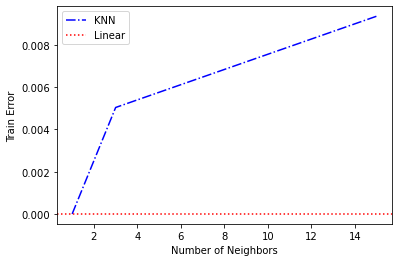

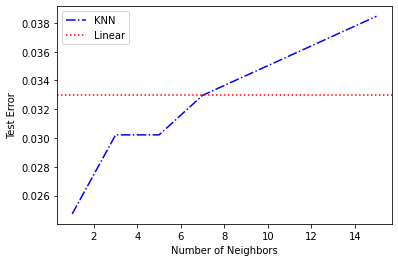

In [5]:
plt.plot(k_values, knn_train_errors, 'b-.', label='KNN')
plt.axhline(lm_train_error, color='r', linestyle=':', label="Linear")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Train Error")

plt.figure()
plt.plot(k_values, knn_test_errors, 'b-.', label="KNN")
plt.axhline(lm_test_error, color='r', linestyle=':', label="Linear")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Test Error");

## Exercise 6

In [6]:
def f1(x):
    return np.sum(x[:, :3], axis=1)

def f2(x):
    return 0.5*np.sum(x[:, :3], axis=1)**3

def simulation(p, k, N=500, nreps=500):
    epe = np.empty((nreps, 4))
    y1_true = 1 
    y2_true = 4
    x0 = np.zeros(p).reshape(1, -1)
    x0[0, 0] = 1.
    
    for rep in range(nreps):
        x = np.random.rand(N, p)
        y1 = f1(x) + np.random.randn(N)
        y2 = f2(x) + np.random.randn(N)

        # Fit models
        linear_model1 = LinearRegression().fit(x, y1)
        linear_model2 = LinearRegression().fit(x, y2)

        knn_model1 = KNeighborsRegressor(n_neighbors=k).fit(x, y1)
        knn_model2 = KNeighborsRegressor(n_neighbors=k).fit(x, y2)
        
        # Test models
        lm1_pred = linear_model1.predict(x0)
        lm2_pred = linear_model2.predict(x0)
        
        knn1_pred = knn_model1.predict(x0)
        knn2_pred = knn_model2.predict(x0)
        
        epe[rep, 0] = (lm1_pred - y1_true)**2
        epe[rep, 1] = (lm2_pred - y2_true)**2
        epe[rep, 2] = (knn1_pred - y1_true)**2
        epe[rep, 3] = (knn2_pred - y2_true)**2
        
    return epe.mean(axis=0)  

In [7]:
p = range(3, 11) # 3 to 10, inclusive 
k = [1,2]


mspe_lm1 = np.zeros((len(p), len(k)))
mspe_lm2 = np.zeros((len(p), len(k)))
mspe_knn1 = np.zeros((len(p), len(k)))
mspe_knn2 = np.zeros((len(p), len(k)))

for i, pval in enumerate(p):
    for j, kval in enumerate(k):
        results = simulation(pval, kval)
    
        mspe_lm1[i,j] = results[0]
        mspe_lm2[i,j] = results[1]
        mspe_knn1[i,j] = results[2]
        mspe_knn2[i,j] = results[3]

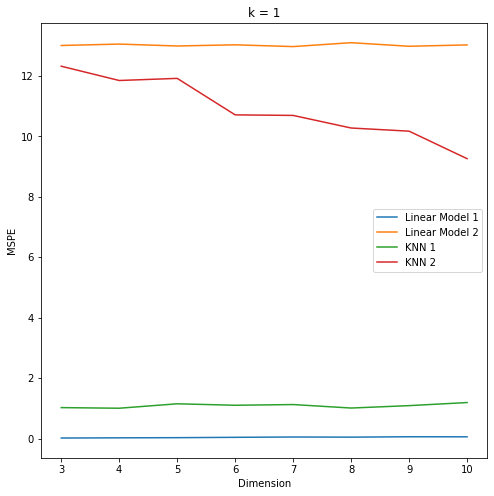

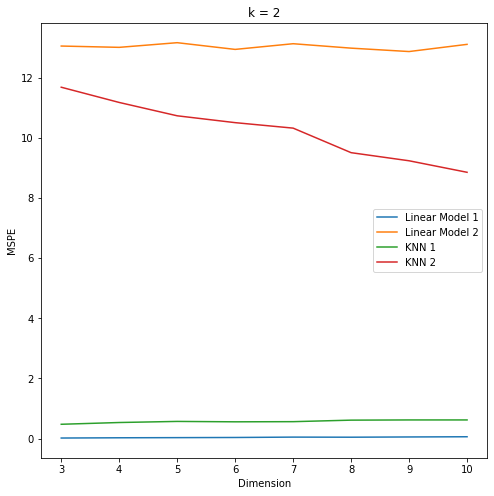

In [8]:
for k in range(1,3):
    plt.figure(figsize=(8,8))
    plt.title("k = {}".format(k))
    plt.plot(p, mspe_lm1[:,k-1], label='Linear Model 1')
    plt.plot(p, mspe_lm2[:,k-1], label='Linear Model 2')
    plt.plot(p, mspe_knn1[:,k-1], label='KNN 1')
    plt.plot(p, mspe_knn2[:,k-1], label='KNN 2')
    plt.xlabel("Dimension")
    plt.ylabel("MSPE")
    plt.legend();

## Exercise 7

In [9]:
def f(x, c=-4):
    return np.exp(c*np.linalg.norm(x, axis=1))

In [10]:
p = range(1,11)
mspe = []
bias_sq = []
variance = []

for pval in p:
    x = np.random.rand(30, pval)
    y = f(x)
    knn = KNeighborsRegressor(n_neighbors=1).fit(x,y)
    predictions = knn.predict(x)
    
    mspe_ = np.mean((predictions - y)**2)
    var_ = np.mean((predictions - predictions.mean())**2)
    bias_sq_ = np.mean((predictions.mean() - y)**2)
    
    mspe.append(mspe_)
    bias_sq.append(bias_sq_)
    variance.append(var_)

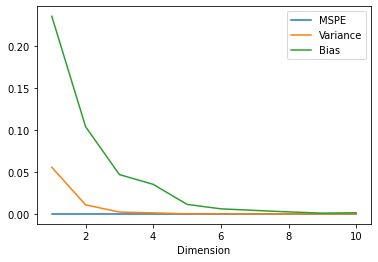

In [11]:
plt.plot(p, mspe, label='MSPE')
plt.plot(p, variance, label='Variance')
plt.plot(p, np.sqrt(bias_sq), label='Bias')
plt.legend()
plt.xlabel("Dimension");